In [78]:
import numpy as np
import random
from random import seed
import math

def Data_set(n, Y1, prev):
    seed(Y1)
    X = []
    for i in range(n):
        x_i = random.random()
        if x_i <= prev :
            X.append(1)
        else:
            X.append(0)    
    return X

In [79]:
def Dorfmans_Method(X,k):
    if k == 1:
        N = len(X)
    else:
        n = len(X)
        G = 0                 #number of positive tests
        i = math.floor(n/k)
        for j in range(i):
            T = sum(X[j*k:(j*k+k)])
            if T != 0:
                G += 1 
        r = n % k
        if r != 0:
            R = sum(X[n-r:n])

            if R != 0: 
                N = G*k + i + r + 1
            else:
                N = G*k + i + 1
        else:
            N = G*k + i
    return N

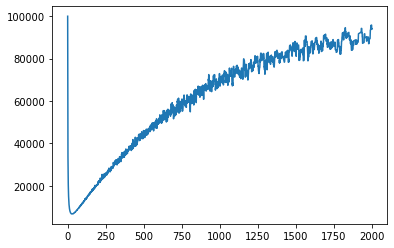

In [80]:
import matplotlib.pyplot as plt


samp = Data_set(100000, 10, 0.001)
Number_of_tests = []
P = 2000
D = 2000
for z in range(1,P):
    Number_of_tests.append(Dorfmans_Method(samp,z))
    
#print(data_plot)
plt.plot(range(1 , D) , Number_of_tests[0:D-1])

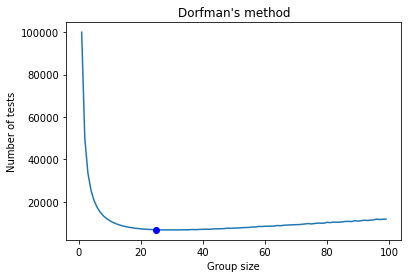

In [81]:
ZoomPlt = []


DSet = Data_set(100000, 10, 0.001)

for z in range(1,100):
            ZoomPlt.append(Dorfmans_Method(DSet,z))



plt.plot(range(1 , 100) , ZoomPlt[:100])
plt.title("Dorfman's method")
plt.ylabel("Number of tests")
plt.xlabel("Group size")
plt.plot([np.array(ZoomPlt).argmin()], [min(ZoomPlt)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')

In [82]:
Plot2 = []
Plot3 = []
Plot4 = []
Plot5 = []
Plot6 = []

for p in [0.01,0.02,0.05,0.1,0.15]:
    
    obj = Data_set(100000, 10, p)
    
    if p == 0.01:
        for z in range(1,50):
            Plot2.append(Dorfmans_Method(obj,z))
    elif p == 0.02:
        for z in range(1,50):
            Plot3.append(Dorfmans_Method(obj,z))
    elif p == 0.05:
        for z in range(1,50):
            Plot4.append(Dorfmans_Method(obj,z))
    elif p == 0.1:
        for z in range(1,50):
            Plot5.append(Dorfmans_Method(obj,z))
    elif p == 0.15:
        for z in range(1,50):
            Plot6.append(Dorfmans_Method(obj,z))
print('done!')

done!


Text(0.5, 0, 'Group size')

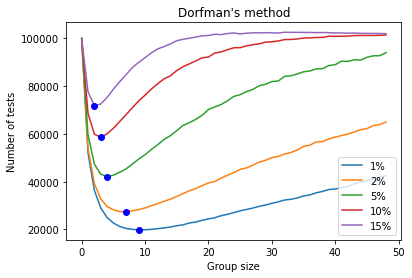

In [83]:
plt.plot(range(0 , 49) , Plot2, label = '1%')
plt.plot(range(0 , 49) , Plot3, label = '2%')
plt.plot(range(0 , 49) , Plot4, label = '5%')
plt.plot(range(0 , 49) , Plot5, label = '10%')
plt.plot(range(0 , 49) , Plot6, label = '15%')
plt.plot([np.array(Plot2).argmin()], [min(Plot2)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
plt.plot([np.array(Plot3).argmin()], [min(Plot3)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
plt.plot([np.array(Plot4).argmin()], [min(Plot4)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
plt.plot([np.array(Plot5).argmin()], [min(Plot5)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
plt.plot([np.array(Plot6).argmin()], [min(Plot6)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
plt.legend(loc="lower right")
plt.title("Dorfman's method")
plt.ylabel("Number of tests")
plt.xlabel("Group size")

In [84]:
#group size agains prevelance 
minN1 = []

for p in np.linspace(0,0.01, num = 20):
    P1 = []
    obj1 = Data_set(100000, 10, p)
    for z in range(1,102):
            P1.append(Dorfmans_Method(obj1,z))
    minN1.append(np.array(P1).argmin())
print('done!') 

done!


Text(0.5, 0, 'Prevalence')

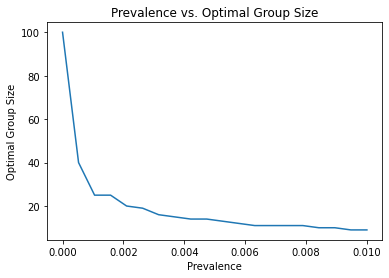

In [85]:
plt.plot(np.linspace(0,0.01, num = 20),minN1)
plt.title("Prevalence vs. Optimal Group Size")
plt.ylabel("Optimal Group Size")
plt.xlabel("Prevalence")

In [87]:
Outter = []

for i in range(100):
    minPLT = []
    for p in np.linspace(0,0.01, num = 50):
        PVal = []
        OBJ = Data_set(100000, i, p)
        for z in range(1,102):
            PVal.append(Dorfmans_Method(OBJ,z))
        minPLT.append(np.array(PVal).argmin())
    Outter.append(minPLT)

print('done!')

done!


100


Text(0.5, 0, 'Prevalence')

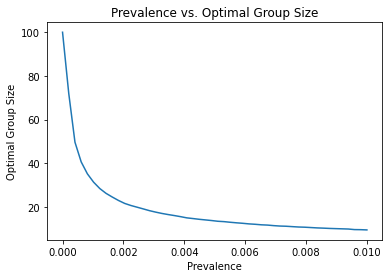

In [90]:
AllPlot = Outter[0]
print(len(Outter))

for j in range(1, len(Outter)):
    AllPlot = np.add(AllPlot, Outter[j])

PrevAv = []
for val in AllPlot:
    PrevAv.append(val/len(Outter))

plt.plot(np.linspace(0,0.01, num = 50),PrevAv)
plt.title("Prevalence vs. Optimal Group Size")
plt.ylabel("Optimal Group Size")
plt.xlabel("Prevalence")


In [91]:
Rows = []
for r in range(len(Outter[0])):
    Row = []
    for c in range(len(Outter)):
        Row.append(Outter[c][r])
    Rows.append(Row)

def bubbleSort(X):
    n = len(X)

    for i in range(n - 1) :
        flag = 0

        for j in range(n - 1) :
            
            if X[j] > X[j + 1] : 
                tmp = X[j]
                X[j] = X[j + 1]
                X[j + 1] = tmp
                flag = 1

        if flag == 0:
            break

    return X


Orderd = []

for t in range(len(Rows)):
    Orderd.append(bubbleSort(Rows[t]))

In [99]:
UP90 = []
LOW10 = []
for i in Orderd:
    UP90.append(i[0])
    LOW10.append(i[-1])

Text(0.5, 0, 'Prevalence')

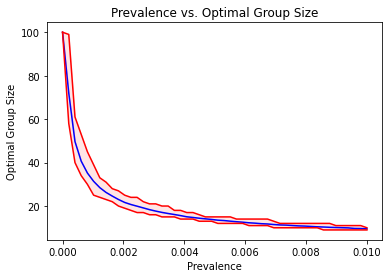

In [100]:
plt.plot(np.linspace(0,0.01, num = 50),PrevAv, color='blue')
plt.plot(np.linspace(0,0.01, num = 50),UP90, color='red')
plt.plot(np.linspace(0,0.01, num = 50),LOW10, color='red')
plt.fill_between(np.linspace(0,0.01, num = 50), PrevAv, UP90, color='red', alpha=.1)
plt.fill_between(np.linspace(0,0.01, num = 50), PrevAv, LOW10, color='red', alpha=.1)
plt.title("Prevalence vs. Optimal Group Size")
plt.ylabel("Optimal Group Size")
plt.xlabel("Prevalence")

In [27]:
def average_plot(p):
    av_plot = []
    
    for i in range(100):
        
        num_plot = []
        samp = Data_set(100000, i, p)

        for z in range(0, 4000):
            z += 1
            num_plot.append(Dorfmans_Method(samp, z))
        
        av_plot.append(num_plot)
        
    total = av_plot[0]
    for j in range(1, np.shape(av_plot)[0]):
        total = np.add(total,av_plot[j])
    
    true_av = []
    for val in total:
        true_av.append(val/np.shape(av_plot)[0])
    return(true_av)

AVGraph = average_plot(0.001)
print('done!')

done!


31


Text(0.5, 0, 'Group size')

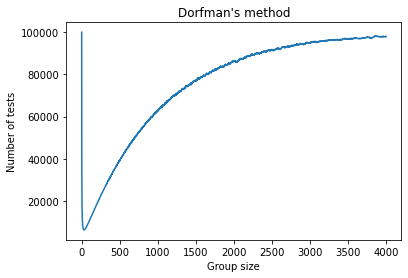

In [213]:
plt.plot(range(0,4000), AVGraph)
print(np.array(AVGraph).argmin())
plt.title("Dorfman's method")
plt.ylabel("Number of tests")
plt.xlabel("Group size")

In [97]:
def Optimal_group(X):
    t = True
    S = 1
    while t:
        y = Dorfmans_Method(X,S)
        z = Dorfmans_Method(X,S+1)
        if y > z:
            S += 1
        else:
            t = False
    return S - 1

In [70]:
def Scan(X):
    Bool = True
    i = 0

    while Bool:
        if X[i] == 1:
            Bool = False
        else:
            i += 1
    return i



def Sterrett_method(X, k):
    
    n = len(X)
    NumberOfTests = 0
    
    i = math.floor(n/k)
    NumberOfTests = i

    GroupIndex = []
    PosGroups = []
    
    for j in range(i):
        T = sum(X[j*k:(j*k+k)])
        if T != 0:
            GroupIndex.append(j)

    for p in GroupIndex:
        PosGroups.append(X[p*k:(p*k+k)])    

    r = n % k
    if r != 0:
        NumberOfTests += 1
        R = X[n-r:n]

        if sum(R) != 0: 
            PosGroups.append(R)
    
    while len(PosGroups) != 0:
        
        SML = []

        for z in PosGroups:
            posTest = Scan(z)
            NumberOfTests += (posTest + 1)

            if sum(z[posTest+1 : ]) != 0:
                SML.append(z[posTest+1 : ])
                NumberOfTests +=  1
            else:
                NumberOfTests +=  1
                
        PosGroups = SML
    
    return NumberOfTests

In [31]:
SMplot1 = []
SMplot2 = []
SMplot3 = []
SMplot4 = []
SMplot5 = []

for p in [0.01,0.02,0.05,0.1,0.15]:
    
    obj = Data_set(100000, 10, p)
    
    if p == 0.01:
        for z in range(1,50):
            SMplot1.append(Sterrett_method(obj,z))
            
    elif p == 0.02:
        for z in range(1,50):
            SMplot2.append(Sterrett_method(obj,z))
    elif p == 0.05:
        for z in range(1,50):
            SMplot3.append(Sterrett_method(obj,z))
    elif p == 0.1:
        for z in range(1,50):
            SMplot4.append(Sterrett_method(obj,z))
    elif p == 0.15:
        for z in range(1,50):
            SMplot5.append(Sterrett_method(obj,z))
print('done!')

done!


Text(0.5, 0, 'Group size')

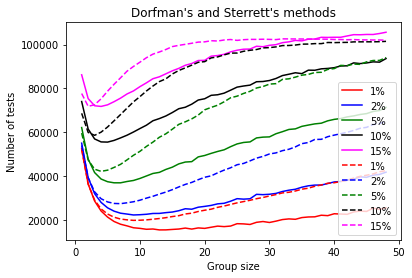

In [32]:
plt.plot(range(1 , 49) , SMplot1[1:], label = '1%',color = 'red')
plt.plot(range(1 , 49) , SMplot2[1:], label = '2%',color = 'blue')
plt.plot(range(1 , 49) , SMplot3[1:], label = '5%',color = 'green')
plt.plot(range(1 , 49) , SMplot4[1:], label = '10%',color = 'black')
plt.plot(range(1 , 49) , SMplot5[1:], label = '15%',color = 'magenta')
#plt.plot([np.array(SMplot1).argmin()], [min(SMplot1)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
#plt.plot([np.array(SMplot2).argmin()], [min(SMplot2)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
#plt.plot([np.array(SMplot3).argmin()], [min(SMplot3)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
#plt.plot([np.array(SMplot4).argmin()], [min(SMplot4)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
#plt.plot([np.array(SMplot5).argmin()], [min(SMplot5)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')

plt.plot(range(1 , 49) , Plot2[1:], label = '1%',color = 'red',linestyle="dashed")
plt.plot(range(1 , 49) , Plot3[1:], label = '2%',color = 'blue',linestyle="dashed")
plt.plot(range(1 , 49) , Plot4[1:], label = '5%',color = 'green',linestyle="dashed")
plt.plot(range(1 , 49) , Plot5[1:], label = '10%',color = 'black',linestyle="dashed")
plt.plot(range(1 , 49) , Plot6[1:], label = '15%',color = 'magenta',linestyle="dashed")
#plt.plot([np.array(Plot2).argmin()], [min(Plot2)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
#plt.plot([np.array(Plot3).argmin()], [min(Plot3)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
#plt.plot([np.array(Plot4).argmin()], [min(Plot4)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
#plt.plot([np.array(Plot5).argmin()], [min(Plot5)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
#plt.plot([np.array(Plot6).argmin()], [min(Plot6)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')


plt.legend(loc="lower right")
plt.title("Dorfman's and Sterrett's methods")
plt.ylabel("Number of tests")
plt.xlabel("Group size")

In [27]:
def average_plot_STER(p):
    av_plot = []
    
    for i in range(100):
        
        num_plot = []
        samp = Data_set(10000, i, p)

        for z in range(0, 4000):
            z += 1
            num_plot.append(Sterrett_method(samp, z))
        
        av_plot.append(num_plot)
        
    total = av_plot[0]
    for j in range(1, np.shape(av_plot)[0]):
        total = np.add(total,av_plot[j])
    
    true_av = []
    for val in total:
        true_av.append(val/np.shape(av_plot)[0])
    return(true_av)

AVGraphSTER = average_plot_STER(0.001)
print('done!')

done!


42


Text(0.5, 0, 'Group size')

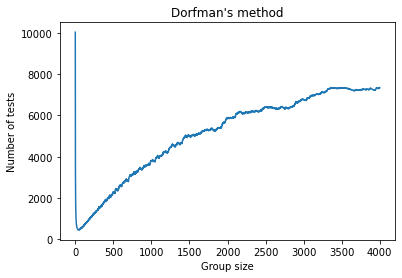

In [28]:
plt.plot(range(0,4000), AVGraphSTER)
print(np.array(AVGraphSTER).argmin())
plt.title("Sterrett's method")
plt.ylabel("Number of tests")
plt.xlabel("Group size")

In [92]:
Outter2 = []

for i in range(100):
    minPLT = []
    for p in np.linspace(0,0.01, num = 50):
        PVal = []
        OBJ = Data_set(100000, i, p)
        for z in range(1,102):
            PVal.append(Sterrett_method(OBJ,z))
        minPLT.append(np.array(PVal).argmin())
    Outter2.append(minPLT)
    
AllPlot = Outter2[0]

for j in range(1, len(Outter2)):
    AllPlot = np.add(AllPlot, Outter2[j])

PrevAvSterrett = []
for val in AllPlot:
    PrevAvSterrett.append(val/len(Outter2))

print('done!')

done!


Text(0.5, 0, 'Prevalence')

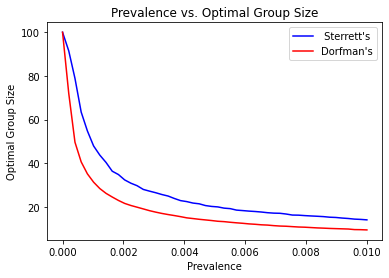

In [46]:
plt.plot(np.linspace(0,0.01, num = 50),PrevAvSterrett, color = 'blue', label =' Sterrett\'s')
plt.plot(np.linspace(0,0.01, num = 50),PrevAv, color = 'red', label = 'Dorfman\'s')
plt.title("Prevalence vs. Optimal Group Size")
plt.ylabel("Optimal Group Size")
plt.legend(loc="upper right")
plt.xlabel("Prevalence")

Text(0.5, 0, 'Prevalence')

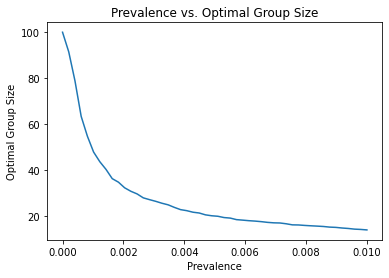

In [45]:
plt.plot(np.linspace(0,0.01, num = 50),PrevAvSterrett)
plt.title("Prevalence vs. Optimal Group Size")
plt.ylabel("Optimal Group Size")
plt.xlabel("Prevalence")

In [67]:
def Gen_test_ed(n, p):
    
    rand_Group = []
    
    for i in range(p):
        rand_Group.append(1)
        
    for i in range(n-p):
        rand_Group.append(0)
    
    random.shuffle(rand_Group)
    
    return(rand_Group)

In [88]:
def HC_Second(X):
    Mat = []
    n = len(X)
    S = math.ceil(n**0.5)
    i = math.floor(n/S)
    
    for j in range(i):
        Mat.append(X[j*S:(j*S+S)])
        
    r = n % S
    if r != 0:
        subMat = X[n-r:n]
        count = 0
        while len(subMat) < S:
            subMat.append(0)
            count += 1
        Mat.append(subMat)
    return(Mat)

print(HC_Second(Gen_test_ed(100,10)))

[[0, 1, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [89]:
def HC(X):
    
    Cube = []
    
    n = len(X)
    C = math.ceil(n/3)
    
    for j in range(3):
        Cube.append(HC_Second(X[j*C:(j*C+C)]))     
        
    return Cube

print(HC(Data_set(100, 1, 0.1)))

[[[0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]]


In [79]:
row = []
col = []

Set = HC_Second(Gen_test_ed(100,10))
for j in range(len(Set)):
    SampCol = []
    for i in range(len(Set)):
        SampCol.append(Set[i][j])
        
    if sum(SampCol) != 0:
        col.append(1)
    else:
        col.append(0)
        
    if sum(Set[j]) != 0:
        row.append(1)
    else:
        row.append(0)

print('')
print(col)
print(row)

print('number of tests', sum(col)*sum(row))


[1, 1, 1, 1, 0, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 0, 0, 0, 1, 0, 1]
number of tests 40


Text(0.5, 1.0, "Dorfman's and Sterrett's methods")

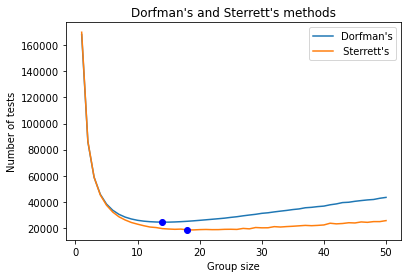

In [95]:
#Test ed using Sterrett and Dorfman 

DSet = Gen_test_ed(168174, 920)

DMeth = []
SMeth = []

for k in range(1,51):
    DMeth.append(Dorfmans_Method(DSet,k))
    SMeth.append(Sterrett_method(DSet, k))
    
plt.plot(range(1,51),DMeth, label = 'Dorfman\'s')
plt.plot(range(1,51),SMeth, label =' Sterrett\'s')

plt.plot([np.array(DMeth).argmin()+1], [min(DMeth)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')
plt.plot([np.array(SMeth).argmin()+1], [min(SMeth)], marker='o', markeredgecolor ='blue', markerfacecolor = 'blue')

plt.ylabel("Number of tests")
plt.legend(loc="upper right")
plt.xlabel("Group size")
plt.title("Dorfman's and Sterrett's methods")

In [96]:
print([np.array(DMeth).argmin()+1])
print([np.array(SMeth).argmin()+1])

[14]
[18]
